In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, glob

IMGS_ROOT = "images"
TARGET_SIZE = (64, 64)

def show_img(img):
    transformed_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(transformed_img) 
    plt.axis("off")
    plt.show()

def load_ref_imgs():
    imgs_path = os.path.join(IMGS_ROOT, "reference")
    cat_imgs_path = os.path.join(imgs_path, "cats")
    dog_imgs_path = os.path.join(imgs_path, "dogs")
    imgs_with_tag = list()

    for f in glob.glob(os.path.join(cat_imgs_path, "*")):
        img = cv2.imread(f)
        img = cv2.resize(img, TARGET_SIZE)
        imgs_with_tag.append((img, "cat"))
    for f in glob.glob(os.path.join(dog_imgs_path, "*")):
        img = cv2.imread(f)
        img = cv2.resize(img, TARGET_SIZE)
        imgs_with_tag.append((img, "dog"))
    return imgs_with_tag

def process(img, k=3):
    imgs_with_tag = load_ref_imgs()
    diff_result = list()

    for tag_img, tag in imgs_with_tag:
        diff_vec = np.absolute(img - tag_img) / 255.
        diff = np.mean(diff_vec)
        diff_result.append((diff, tag))

    cat_cnt = 0
    dog_cnt = 0

    diff_result.sort(key=lambda x:x[0])
    for i in range(k):
        _, tag = diff_result[i]
        if tag == "cat":
            cat_cnt += 1
        elif tag == "dog":
            dog_cnt += 1

    if cat_cnt > dog_cnt:
        print("k={}, it is cat".format(k))
    elif cat_cnt < dog_cnt:
        print("k={}, it is dog".format(k))
    else:
        print("k={}, I have no idea.".format(k))

def choose_number():
    select = None
    while True:
        print("Please enter a number (1~20).")
        val = input()
        if not val.isnumeric():
            print("Not a nmuber or not integer.")
            continue
        select = int(val)
        if select < 1 or select > 20:
            print("Out or the range.")
            continue
        break
    return select

Please enter a number (1~20).


 1


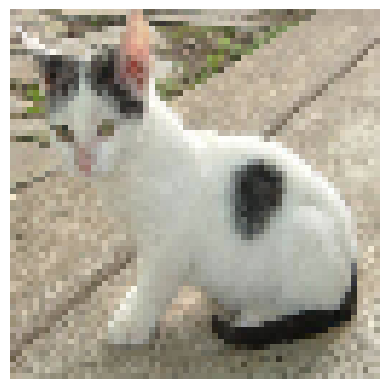

In [10]:
select = choose_number()
imgs_path = os.path.join(IMGS_ROOT, "test")
img = cv2.imread(os.path.join(imgs_path, "pic{}.jpg".format(select)))
img = cv2.resize(img, TARGET_SIZE)
show_img(img)

### 當 k 值為 3 時的預測結果

In [8]:
process(img, k=3)

k=3, It is dog


### 不同 k 值對精準度的影響，當 k 為 1 時準度最高，因為資料集中，包含測試資料，當 k 為 1 時誤差為 0，但當 k 為其它數值時，則是完全隨機的。

In [12]:
for k in range(1, 10):
    process(img, k=k)

k=1, It is cat
k=2, I have no idea.
k=3, It is dog
k=4, It is dog
k=5, It is dog
k=6, I have no idea.
k=7, It is dog
k=8, I have no idea.
k=9, It is cat


### 此方法判斷的問題為，顏色不能代表物體的種類，例如一個白色狗和白色的貓，在此種分類中可能會被當成同一種類，而白色貓和黑色的貓，可能會被當成不同種類。